## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9666707	total: 162ms	remaining: 2m 41s
1:	learn: 0.9345395	total: 164ms	remaining: 1m 21s
2:	learn: 0.9072925	total: 165ms	remaining: 54.9s
3:	learn: 0.8766041	total: 167ms	remaining: 41.5s
4:	learn: 0.8518207	total: 168ms	remaining: 33.3s
5:	learn: 0.8242921	total: 168ms	remaining: 27.9s
6:	learn: 0.8018139	total: 169ms	remaining: 24s
7:	learn: 0.7788846	total: 171ms	remaining: 21.2s
8:	learn: 0.7528548	total: 172ms	remaining: 19s
9:	learn: 0.7289622	total: 174ms	remaining: 17.2s
10:	learn: 0.7075669	total: 182ms	remaining: 16.4s


11:	learn: 0.6846750	total: 184ms	remaining: 15.1s
12:	learn: 0.6648917	total: 186ms	remaining: 14.1s
13:	learn: 0.6447905	total: 187ms	remaining: 13.2s
14:	learn: 0.6243209	total: 188ms	remaining: 12.4s
15:	learn: 0.6045918	total: 190ms	remaining: 11.7s
16:	learn: 0.5858913	total: 191ms	remaining: 11s
17:	learn: 0.5687715	total: 191ms	remaining: 10.4s
18:	learn: 0.5519010	total: 192ms	remaining: 9.92s
19:	learn: 0.5363908	total: 193ms	remaining: 9.45s
20:	learn: 0.5212757	total: 193ms	remaining: 9.02s
21:	learn: 0.5070472	total: 194ms	remaining: 8.63s
22:	learn: 0.4913969	total: 195ms	remaining: 8.28s
23:	learn: 0.4754476	total: 196ms	remaining: 7.96s
24:	learn: 0.4607675	total: 198ms	remaining: 7.72s
25:	learn: 0.4473190	total: 199ms	remaining: 7.46s
26:	learn: 0.4346546	total: 203ms	remaining: 7.31s
27:	learn: 0.4211067	total: 204ms	remaining: 7.07s
28:	learn: 0.4087475	total: 205ms	remaining: 6.85s
29:	learn: 0.3971599	total: 206ms	remaining: 6.65s
30:	learn: 0.3851799	total: 207ms

118:	learn: 0.0650654	total: 304ms	remaining: 2.25s
119:	learn: 0.0642441	total: 305ms	remaining: 2.24s
120:	learn: 0.0635956	total: 308ms	remaining: 2.24s
121:	learn: 0.0628183	total: 309ms	remaining: 2.23s
122:	learn: 0.0624407	total: 311ms	remaining: 2.21s
123:	learn: 0.0620822	total: 314ms	remaining: 2.22s
124:	learn: 0.0614871	total: 317ms	remaining: 2.22s
125:	learn: 0.0609680	total: 319ms	remaining: 2.21s
126:	learn: 0.0604669	total: 319ms	remaining: 2.19s


127:	learn: 0.0600884	total: 320ms	remaining: 2.18s
128:	learn: 0.0596383	total: 335ms	remaining: 2.26s
129:	learn: 0.0593155	total: 337ms	remaining: 2.25s
130:	learn: 0.0587650	total: 338ms	remaining: 2.24s
131:	learn: 0.0583579	total: 338ms	remaining: 2.23s
132:	learn: 0.0580315	total: 339ms	remaining: 2.21s
133:	learn: 0.0576268	total: 343ms	remaining: 2.22s
134:	learn: 0.0571579	total: 345ms	remaining: 2.21s
135:	learn: 0.0566508	total: 347ms	remaining: 2.2s
136:	learn: 0.0562040	total: 349ms	remaining: 2.2s
137:	learn: 0.0555922	total: 350ms	remaining: 2.19s
138:	learn: 0.0553663	total: 353ms	remaining: 2.19s
139:	learn: 0.0551452	total: 354ms	remaining: 2.17s
140:	learn: 0.0545771	total: 354ms	remaining: 2.16s
141:	learn: 0.0542371	total: 357ms	remaining: 2.15s
142:	learn: 0.0538729	total: 358ms	remaining: 2.15s
143:	learn: 0.0535147	total: 359ms	remaining: 2.14s
144:	learn: 0.0532300	total: 360ms	remaining: 2.12s
145:	learn: 0.0529281	total: 362ms	remaining: 2.12s
146:	learn: 0.

207:	learn: 0.0408987	total: 447ms	remaining: 1.7s
208:	learn: 0.0407819	total: 451ms	remaining: 1.71s
209:	learn: 0.0406758	total: 453ms	remaining: 1.7s
210:	learn: 0.0404302	total: 454ms	remaining: 1.7s
211:	learn: 0.0403405	total: 457ms	remaining: 1.7s
212:	learn: 0.0402587	total: 457ms	remaining: 1.69s
213:	learn: 0.0401947	total: 458ms	remaining: 1.68s
214:	learn: 0.0400751	total: 461ms	remaining: 1.68s
215:	learn: 0.0400068	total: 463ms	remaining: 1.68s
216:	learn: 0.0397978	total: 464ms	remaining: 1.67s
217:	learn: 0.0397127	total: 465ms	remaining: 1.67s


218:	learn: 0.0395619	total: 466ms	remaining: 1.66s
219:	learn: 0.0394618	total: 468ms	remaining: 1.66s
220:	learn: 0.0393509	total: 469ms	remaining: 1.65s
221:	learn: 0.0391872	total: 470ms	remaining: 1.65s
222:	learn: 0.0390580	total: 472ms	remaining: 1.64s
223:	learn: 0.0389625	total: 472ms	remaining: 1.64s
224:	learn: 0.0388495	total: 474ms	remaining: 1.63s
225:	learn: 0.0387397	total: 475ms	remaining: 1.63s
226:	learn: 0.0386776	total: 476ms	remaining: 1.62s
227:	learn: 0.0385579	total: 477ms	remaining: 1.61s
228:	learn: 0.0385045	total: 478ms	remaining: 1.61s
229:	learn: 0.0383956	total: 479ms	remaining: 1.6s
230:	learn: 0.0382379	total: 483ms	remaining: 1.61s
231:	learn: 0.0381432	total: 484ms	remaining: 1.6s
232:	learn: 0.0379240	total: 486ms	remaining: 1.6s
233:	learn: 0.0377622	total: 487ms	remaining: 1.59s
234:	learn: 0.0375686	total: 488ms	remaining: 1.59s
235:	learn: 0.0374825	total: 489ms	remaining: 1.58s
236:	learn: 0.0373235	total: 490ms	remaining: 1.58s
237:	learn: 0.0

265:	learn: 0.0344870	total: 532ms	remaining: 1.47s
266:	learn: 0.0344233	total: 533ms	remaining: 1.46s
267:	learn: 0.0343276	total: 534ms	remaining: 1.46s
268:	learn: 0.0342635	total: 535ms	remaining: 1.45s
269:	learn: 0.0341876	total: 537ms	remaining: 1.45s
270:	learn: 0.0341059	total: 538ms	remaining: 1.45s
271:	learn: 0.0340302	total: 539ms	remaining: 1.44s
272:	learn: 0.0338811	total: 540ms	remaining: 1.44s
273:	learn: 0.0337409	total: 542ms	remaining: 1.44s
274:	learn: 0.0336879	total: 544ms	remaining: 1.43s
275:	learn: 0.0336184	total: 548ms	remaining: 1.44s
276:	learn: 0.0335443	total: 551ms	remaining: 1.44s
277:	learn: 0.0334115	total: 553ms	remaining: 1.44s
278:	learn: 0.0333058	total: 558ms	remaining: 1.44s
279:	learn: 0.0332068	total: 560ms	remaining: 1.44s
280:	learn: 0.0331360	total: 560ms	remaining: 1.43s
281:	learn: 0.0330638	total: 563ms	remaining: 1.43s
282:	learn: 0.0329622	total: 565ms	remaining: 1.43s
283:	learn: 0.0328990	total: 567ms	remaining: 1.43s
284:	learn: 

367:	learn: 0.0274641	total: 656ms	remaining: 1.13s
368:	learn: 0.0274108	total: 657ms	remaining: 1.12s
369:	learn: 0.0273104	total: 659ms	remaining: 1.12s
370:	learn: 0.0272758	total: 660ms	remaining: 1.12s
371:	learn: 0.0271932	total: 661ms	remaining: 1.11s
372:	learn: 0.0271379	total: 662ms	remaining: 1.11s
373:	learn: 0.0270542	total: 663ms	remaining: 1.11s
374:	learn: 0.0270088	total: 664ms	remaining: 1.1s
375:	learn: 0.0269705	total: 664ms	remaining: 1.1s
376:	learn: 0.0269328	total: 665ms	remaining: 1.1s
377:	learn: 0.0268636	total: 666ms	remaining: 1.1s
378:	learn: 0.0268289	total: 667ms	remaining: 1.09s
379:	learn: 0.0268042	total: 668ms	remaining: 1.09s
380:	learn: 0.0267532	total: 669ms	remaining: 1.09s
381:	learn: 0.0267078	total: 670ms	remaining: 1.08s
382:	learn: 0.0266417	total: 671ms	remaining: 1.08s
383:	learn: 0.0265782	total: 671ms	remaining: 1.08s
384:	learn: 0.0265330	total: 672ms	remaining: 1.07s
385:	learn: 0.0264900	total: 673ms	remaining: 1.07s
386:	learn: 0.02

563:	learn: 0.0207162	total: 803ms	remaining: 621ms
564:	learn: 0.0206946	total: 803ms	remaining: 618ms
565:	learn: 0.0206837	total: 804ms	remaining: 616ms
566:	learn: 0.0206714	total: 807ms	remaining: 616ms
567:	learn: 0.0206467	total: 807ms	remaining: 614ms
568:	learn: 0.0206261	total: 808ms	remaining: 612ms
569:	learn: 0.0206017	total: 809ms	remaining: 610ms
570:	learn: 0.0205779	total: 809ms	remaining: 608ms
571:	learn: 0.0205599	total: 810ms	remaining: 606ms
572:	learn: 0.0205452	total: 810ms	remaining: 604ms
573:	learn: 0.0205039	total: 811ms	remaining: 602ms
574:	learn: 0.0204765	total: 812ms	remaining: 600ms
575:	learn: 0.0204534	total: 812ms	remaining: 598ms
576:	learn: 0.0204300	total: 813ms	remaining: 596ms
577:	learn: 0.0204194	total: 813ms	remaining: 594ms
578:	learn: 0.0203880	total: 813ms	remaining: 591ms
579:	learn: 0.0203714	total: 814ms	remaining: 589ms
580:	learn: 0.0203500	total: 814ms	remaining: 587ms
581:	learn: 0.0203279	total: 815ms	remaining: 585ms
582:	learn: 

720:	learn: 0.0177699	total: 937ms	remaining: 362ms
721:	learn: 0.0177624	total: 937ms	remaining: 361ms
722:	learn: 0.0177530	total: 938ms	remaining: 359ms
723:	learn: 0.0177235	total: 938ms	remaining: 358ms
724:	learn: 0.0176899	total: 939ms	remaining: 356ms
725:	learn: 0.0176665	total: 939ms	remaining: 354ms
726:	learn: 0.0176518	total: 940ms	remaining: 353ms
727:	learn: 0.0176307	total: 940ms	remaining: 351ms
728:	learn: 0.0176145	total: 942ms	remaining: 350ms
729:	learn: 0.0176010	total: 942ms	remaining: 348ms
730:	learn: 0.0175758	total: 945ms	remaining: 348ms
731:	learn: 0.0175696	total: 946ms	remaining: 346ms
732:	learn: 0.0175451	total: 947ms	remaining: 345ms
733:	learn: 0.0175275	total: 948ms	remaining: 344ms
734:	learn: 0.0175080	total: 949ms	remaining: 342ms
735:	learn: 0.0174794	total: 951ms	remaining: 341ms
736:	learn: 0.0174703	total: 952ms	remaining: 340ms
737:	learn: 0.0174649	total: 952ms	remaining: 338ms
738:	learn: 0.0174563	total: 953ms	remaining: 337ms
739:	learn: 

914:	learn: 0.0150494	total: 1.06s	remaining: 98.4ms
915:	learn: 0.0150367	total: 1.06s	remaining: 97.2ms
916:	learn: 0.0150339	total: 1.06s	remaining: 96ms
917:	learn: 0.0150258	total: 1.06s	remaining: 94.8ms
918:	learn: 0.0150088	total: 1.06s	remaining: 93.6ms
919:	learn: 0.0150006	total: 1.06s	remaining: 92.4ms
920:	learn: 0.0149821	total: 1.06s	remaining: 91.2ms
921:	learn: 0.0149703	total: 1.06s	remaining: 90ms
922:	learn: 0.0149595	total: 1.06s	remaining: 88.8ms
923:	learn: 0.0149514	total: 1.06s	remaining: 87.6ms
924:	learn: 0.0149436	total: 1.06s	remaining: 86.3ms
925:	learn: 0.0149287	total: 1.06s	remaining: 85.1ms
926:	learn: 0.0149216	total: 1.06s	remaining: 83.9ms
927:	learn: 0.0149139	total: 1.06s	remaining: 82.7ms
928:	learn: 0.0149048	total: 1.07s	remaining: 81.5ms
929:	learn: 0.0148980	total: 1.07s	remaining: 80.3ms
930:	learn: 0.0148915	total: 1.07s	remaining: 79.1ms
931:	learn: 0.0148819	total: 1.07s	remaining: 77.9ms
932:	learn: 0.0148617	total: 1.07s	remaining: 76.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01846815957571439
ABC Pre-generator MAE 1.0053037941427514


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

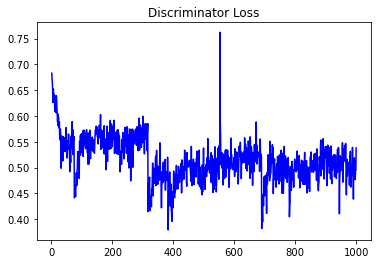

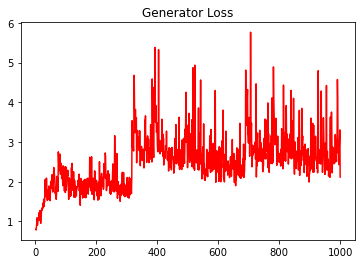

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.07698893481405912


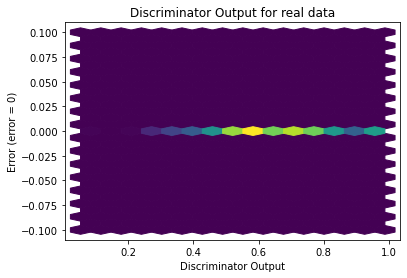

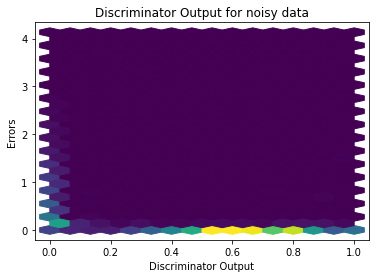

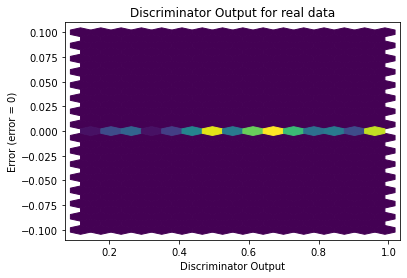

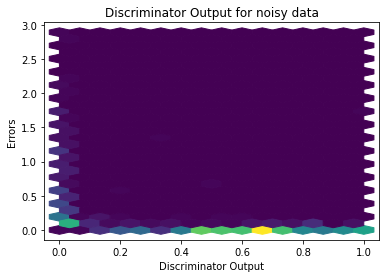

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


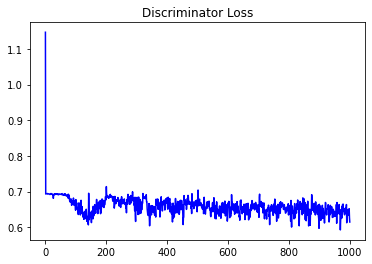

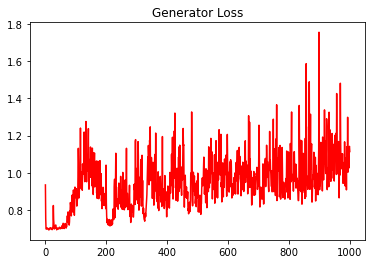

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.13160442765850525


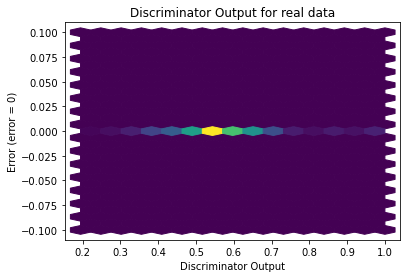

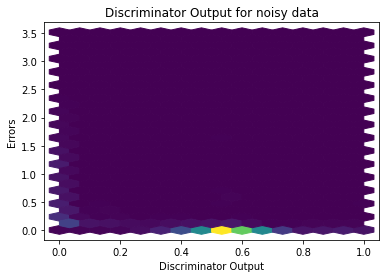

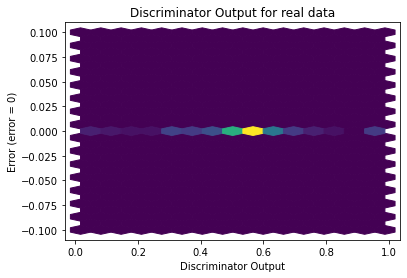

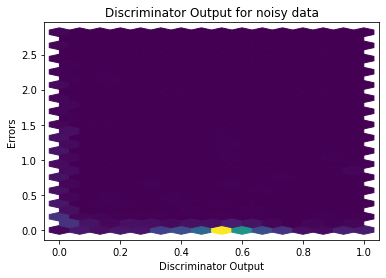

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


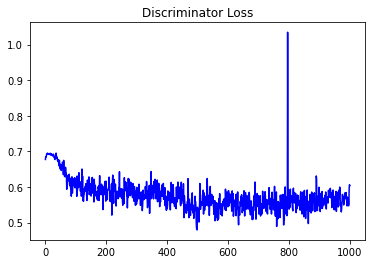

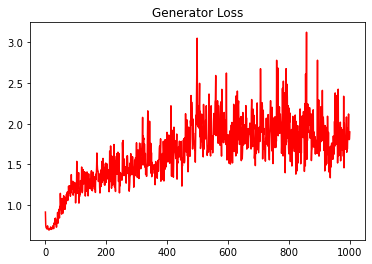

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08314615651432956


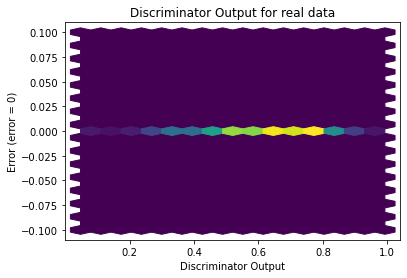

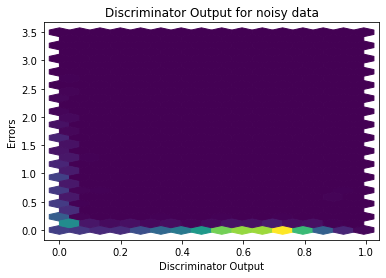

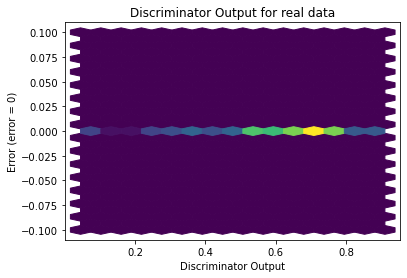

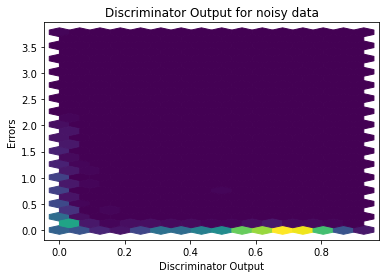

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2750]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4251]], requires_grad=True)
